# Clifford Volume and Free-fermion Benchmark 
## Braket demonstration


The following package are required to run this tutorial:
- `braket`

Make sure these package are installed in your Python environment.

If needed, you can install it via:
```bash
pip install amazon-braket-sdk



In [ ]:
from frontier import (
    CliffordVolumeBenchmark,
    FreeFermionVolumeBenchmark,
)

# braket for tests
from braket.circuits import Circuit
from braket.devices import LocalSimulator

 # Free-fermion Volume Benchmark with Braket

In [9]:
# generate benchmark

n_qubits = 5
sample_size = 4
shots = 2000

Clifford_benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm3",
    target_sdk="braket",
    shots=shots,
    auto_save=False,
)
_ = Clifford_benchmark.create_benchmark()


FreeFermion_benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm3",
    target_sdk="braket",
    shots=shots,
    auto_save=False,
)

_ = FreeFermion_benchmark.create_benchmark()

In [10]:
# get all circuts
Clifford_qasm = Clifford_benchmark.get_all_circuits()
Freefermion_qasm = FreeFermion_benchmark.get_all_circuits()

# transpile all circuits
Clifford_circuits = [Circuit.from_ir(qc) for qc in Clifford_qasm]
Freefermion_circuits = [Circuit.from_ir(qc) for qc in Freefermion_qasm]

## Running and Evaluating the Circuits

Once circuits are prepared, we simulate them on a virtual (ideal) backend and retrieve measurement counts.

In [15]:
device = LocalSimulator("braket_sv")

task = device.run_batch(Clifford_circuits, shots=Clifford_benchmark.shots)
results = task.results()

Clifford_counts = [result.measurement_counts for result in results]

task = device.run_batch(Freefermion_circuits, shots=FreeFermion_benchmark.shots)
results = task.results()

Freefermion_counts = [result.measurement_counts for result in results]

Add experimental results to the benchmark instance and evaulate the becnhmark.

In [16]:
Clifford_benchmark.add_experimental_results(
    Clifford_counts,
    experiment_id="braket_clifford_demo",
    platform="tket",
    experiment_metadata={"backend": "Braket local statevector simulator"},
)


FreeFermion_benchmark.add_experimental_results(
    Freefermion_counts,
    experiment_id="braket_freefermion_demo",
    platform="braket",
    experiment_metadata={"backend": "Braket local statevector simulator"},
)

### Evaluate and plot benchmark


 Clifford Benchmark Evaluation (5 qubits)
Thresholds: τ_S = 1/e = 0.367879   τ_D = 1/(2e) = 0.183940
Shots per circuit: 2000
--------------------------------------------------------------
Stabilizers (all measured):
  • mean ± std: 1.000000 ± 0.000000
  • min EV:     1.000000
Destabilizers (all measured):
  • mean ± std: 0.008750 ± 0.021097
  • max |EV|:   0.055000
--------------------------------------------------------------
Per-sample pass count: 4/4
Worst stabilizer margin (min over samples of <S>-2σ): sample 0 -> 1.000000
Worst destabilizer margin (max over samples of |<D>|+2σ): sample 3 -> 0.099654
Benchmark passed (all samples): True



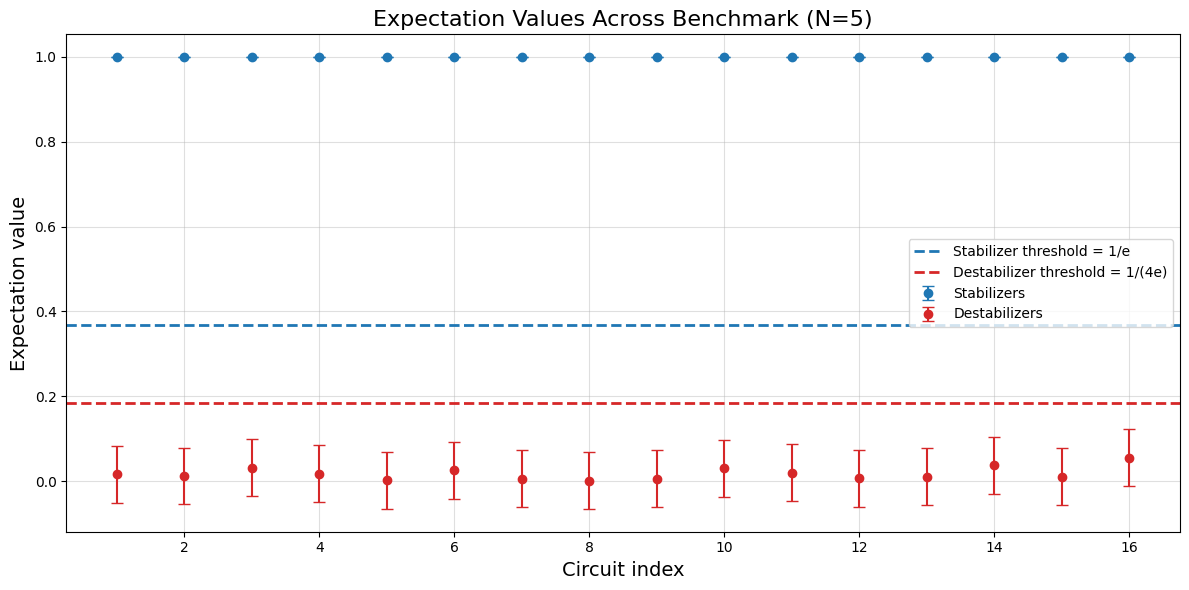

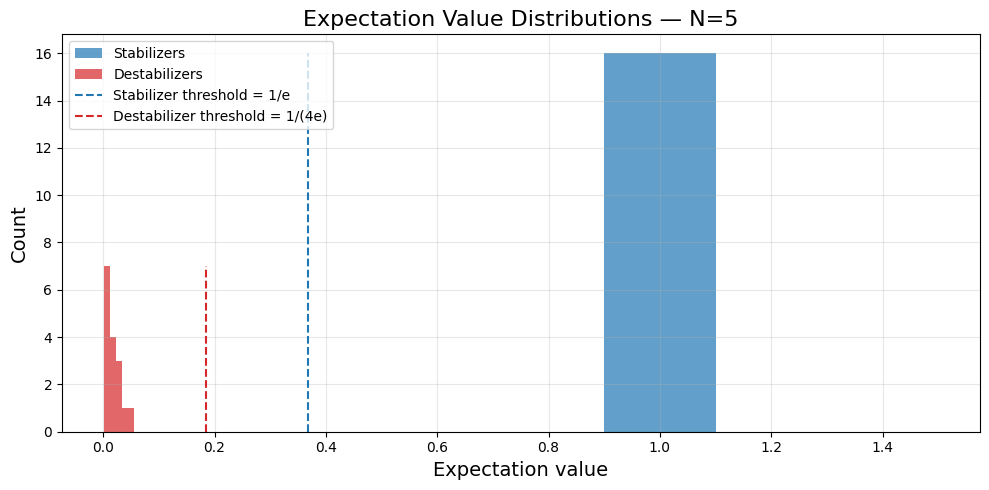

In [17]:
# Clifford Volume
evaluation = Clifford_benchmark.evaluate_benchmark()
Clifford_benchmark.plot_all_expectation_values()
Clifford_benchmark.plot_expectation_histograms(bins=5)


 Free-Fermion Benchmark Evaluation (5 qubits)

Parallel projected values (should be near 1):
  • average: 1.008134 ± 0.016259
  • lowest measured value: 0.981170

Orthogonal projected values (should be near 0):
  • average: -0.005181 ± 0.030194
  • highest absolute value: 0.043200


Benchmark passed: True



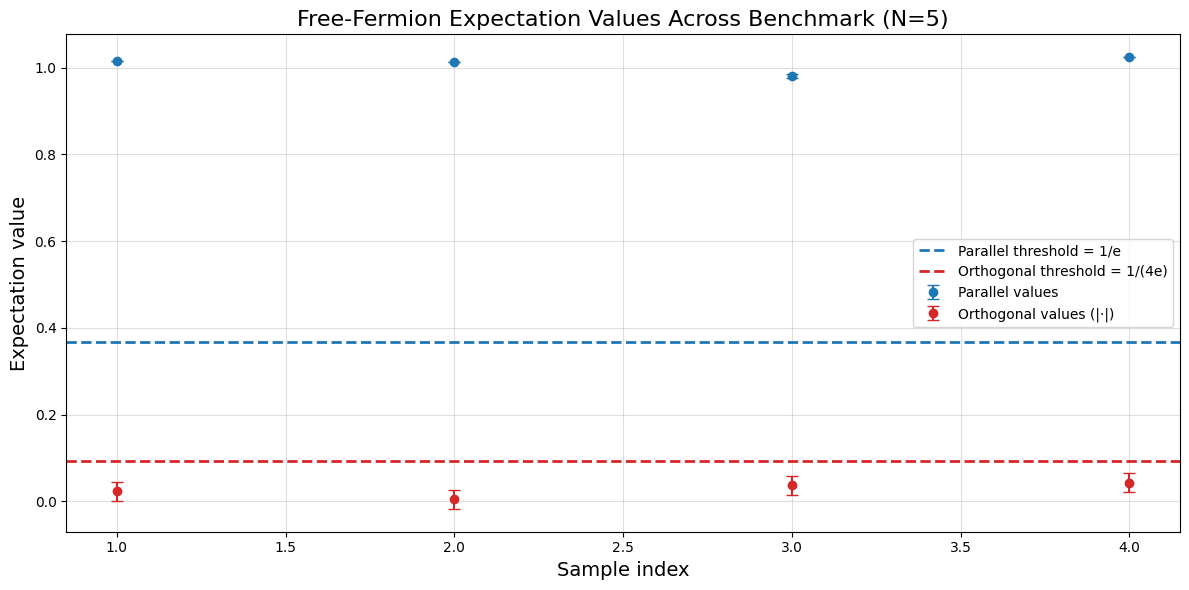

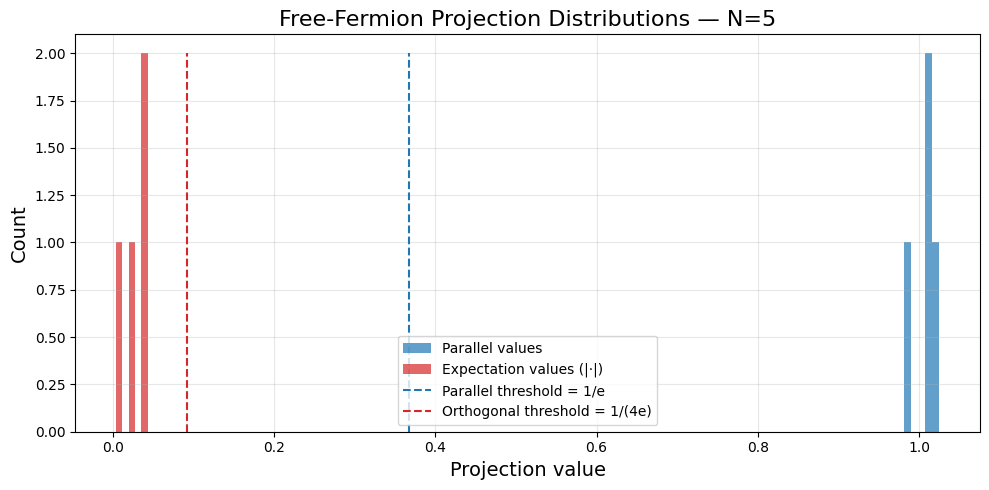

In [18]:
# Free-fermion Volume
evaluation = FreeFermion_benchmark.evaluate_benchmark()
FreeFermion_benchmark.plot_all_expectation_values()
FreeFermion_benchmark.plot_expectation_histograms(bins=5)